In [2]:
%run './model/multi_corpus.py'
%run './constants.py'

from matplotlib import gridspec

sns.set(rc = {'figure.figsize':(15,8)})

# Temporal Distribution

In [40]:
temporal_dfs_path = os.path.join(OUTPUT_PATH, 'temporal_dfs')
data = []
field_names = []
for file_name in os.listdir(temporal_dfs_path):
    field_name = file_name.split('.parquet')[0]
    df = pl.read_parquet(os.path.join(temporal_dfs_path, file_name))
    field_names.append(field_name)
    data.append((df['Year'], df['DoiCount']))
    data.append((df['Year'], df['CumDoiCount']))

data = [data[i:i+4] for i in range(0, len(data), 4)]
field_names = [field_names[i:i+2] for i in range(0, len(field_names), 2)]

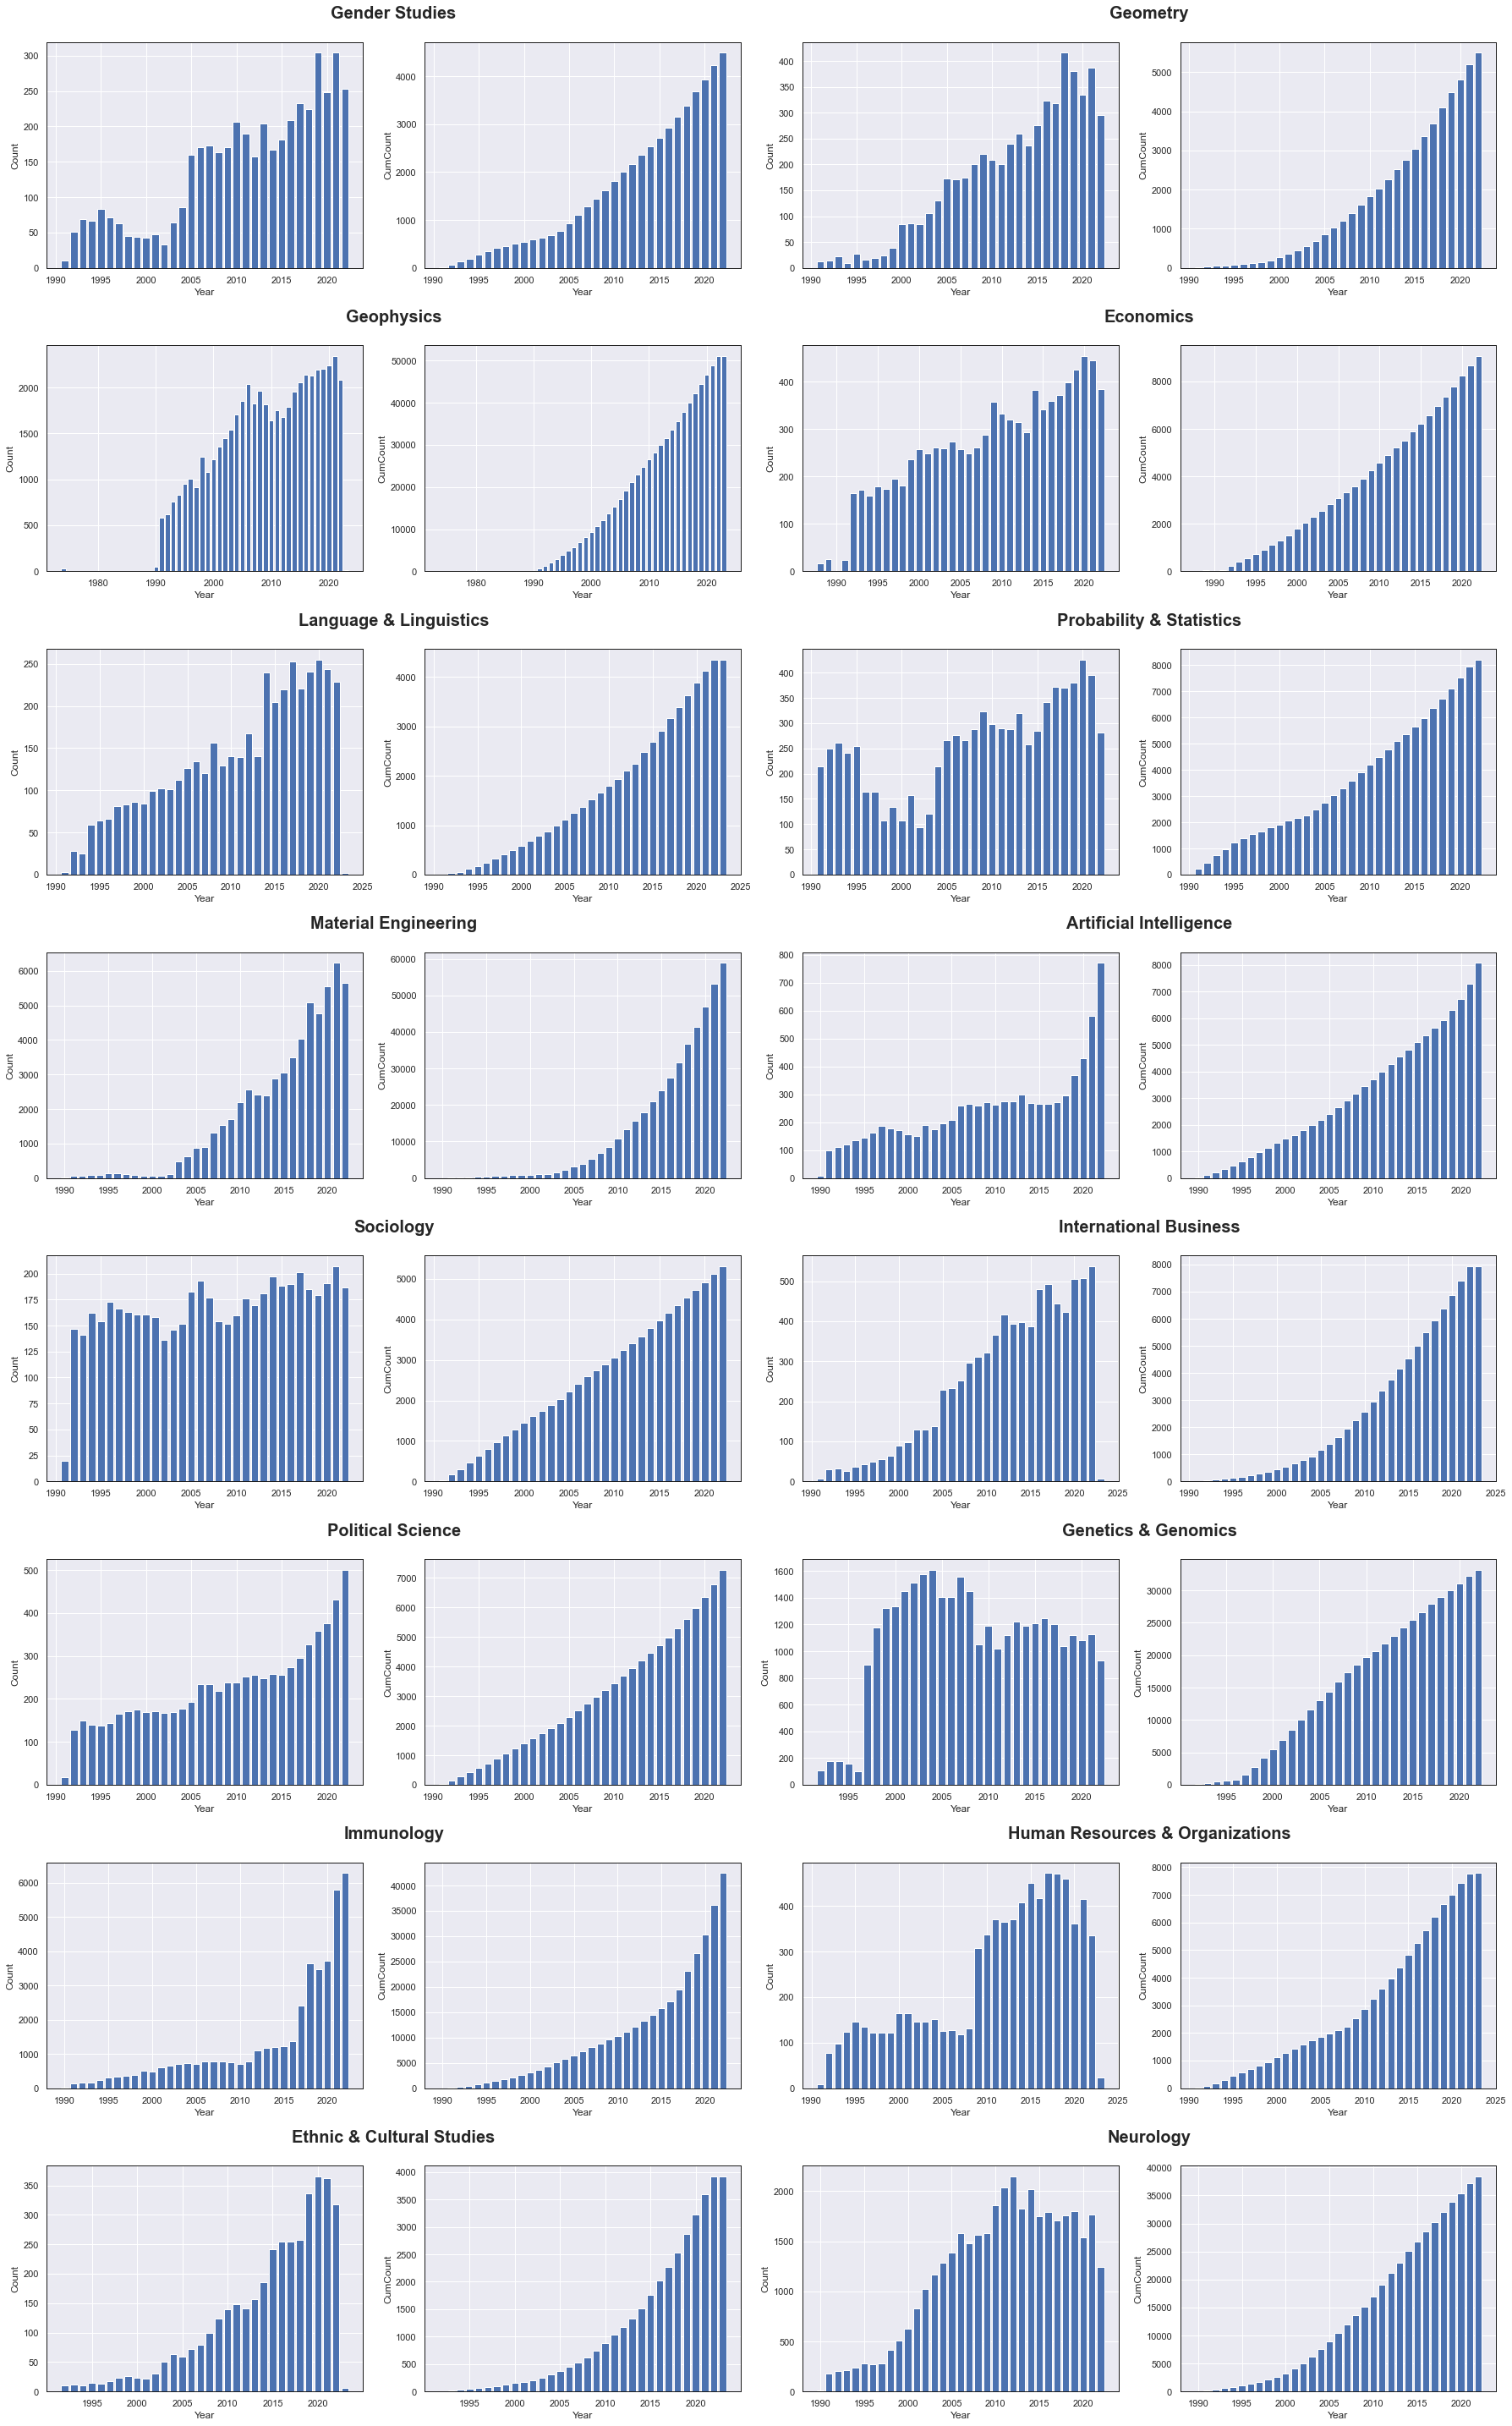

In [43]:
from matplotlib.gridspec import GridSpec

n_fields = len([f for field in field_names for f in field])
n_cols = 4
n_rows = int((n_fields+1 if n_fields%2 != 0 else n_fields) / 2)

fig = plt.figure(figsize=(25, n_rows*5))
gs = gridspec.GridSpec(n_rows, n_cols)

for i in range(n_rows):

    row = fig.add_subplot(gs[i, 0:2])
    row.set_frame_on(False)
    row.axis('off')
    try:
        row.set_title(f'{field_names[i][0]}\n', fontweight='semibold', fontsize=20)
    except IndexError:
        pass
    
    row = fig.add_subplot(gs[i, 2:5])
    row.set_frame_on(False)
    row.axis('off')
    try:
        row.set_title(f'{field_names[i][1]}\n', fontweight='semibold', fontsize=20)
    except IndexError:
        pass

    for j in range(n_cols):
        try:
            x, y = data[i][j]
            ax = fig.add_subplot(gs[i, j])
        except IndexError:
            continue
        
        ax.bar(x, y)

        if j%2 == 0:
            ax.set_xlabel('Year')
            ax.set_ylabel('Count')
        else:
            ax.set_xlabel('Year')
            ax.set_ylabel('CumCount')

        ax.spines['top'].set_color('k')
        ax.spines['top'].set_linewidth(1)
        ax.spines['bottom'].set_color('k')
        ax.spines['bottom'].set_linewidth(1)
        ax.spines['right'].set_color('k')
        ax.spines['right'].set_linewidth(1)
        ax.spines['left'].set_color('k')
        ax.spines['left'].set_linewidth(1)

plt.tight_layout()

plt.savefig(f'{OBSIDIAN_IMG_PATH}/citation_count_over_time.png')
plt.show()

# 8 s

# Temporal DAG Longest Path Length

In [37]:
temporal_dfs_path = os.path.join(OUTPUT_PATH, 'temporal_dfs')
data = []
field_names = []
for file_name in os.listdir(temporal_dfs_path):
    field_name = file_name.split('.parquet')[0]
    df = pl.read_parquet(os.path.join(temporal_dfs_path, file_name))
    field_names.append(field_name)
    data.append((df['Year'], df['CumDoi']))

Gender Studies
Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


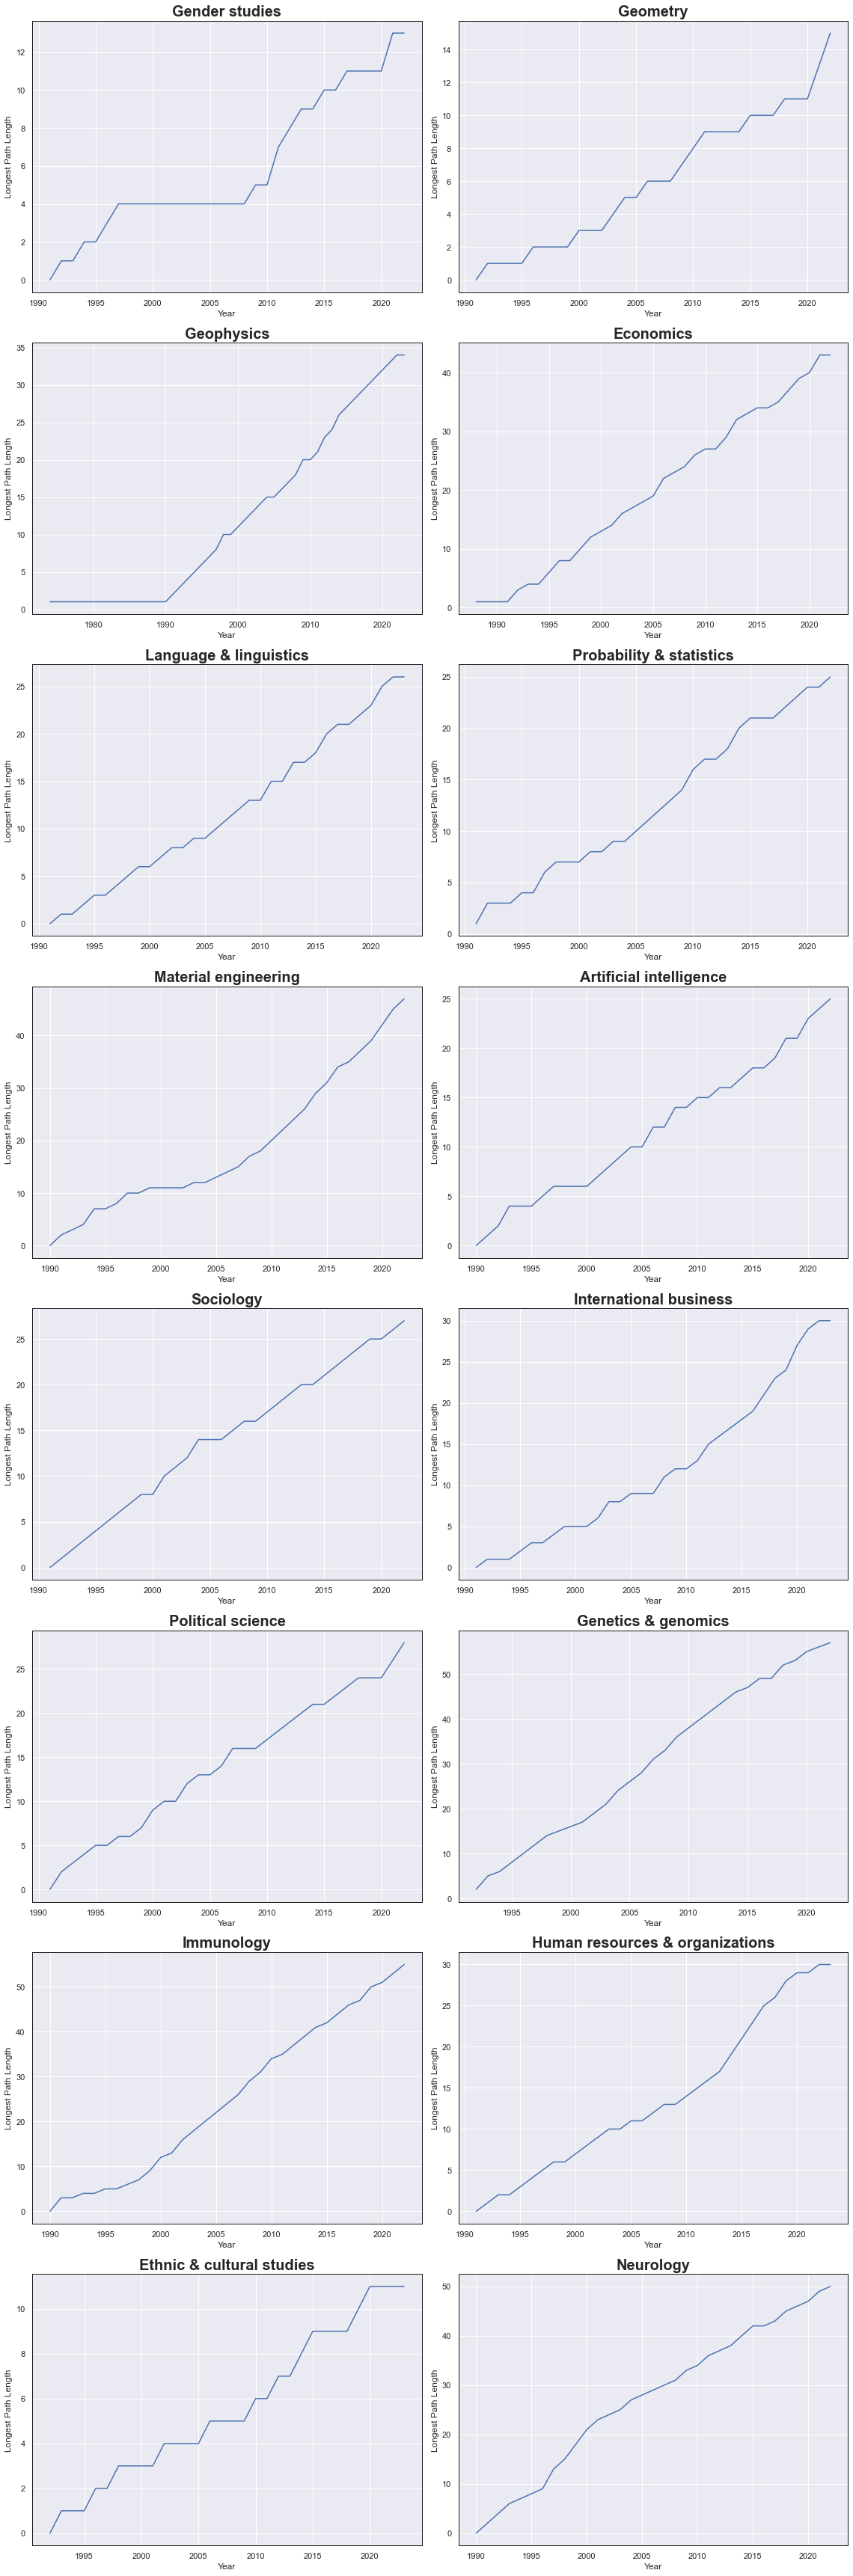

In [118]:
n_cols = 2
n_rows = np.ceil(len(field_names) / n_cols)

sns.set()

fig, axs = plt.subplots(int(n_rows), int(n_cols), figsize=(n_cols*8, n_rows*6))
for field_name, (years, dois), ax in zip(field_names, data, axs.flatten()):

    print(field_name)

    df = pl.read_csv(os.path.join(OUTPUT_PATH, 'citation_graphs', field_name + '.edgelist'), sep=' ', has_header=False)
    G = nx.from_pandas_edgelist(df, create_using=nx.DiGraph, source='column_1', target='column_2')

    longest_path_lengths = {}
    for year, doi in zip(years, dois):
        longest_path_lengths[year] = nx.dag_longest_path_length(G.subgraph(doi))

    years = longest_path_lengths.keys()
    longest_path_lengths = longest_path_lengths.values()

    ax.plot(years, longest_path_lengths)
    ax.set_xlabel('Year')
    ax.set_ylabel('Longest Path Length')

    ax.spines['top'].set_color('k')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['right'].set_color('k')
    ax.spines['right'].set_linewidth(1)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1)

    ax.set_title(field_name.capitalize(), fontweight='semibold', fontsize=20)

fig.tight_layout()
plt.savefig(f'{OBSIDIAN_IMG_PATH}/dag_longest_path_length.png')

plt.show()

# 3 m

# Temporal Logarithmically Increasing Geodesic

In [162]:
temporal_dfs_path = os.path.join(OUTPUT_PATH, 'temporal_dfs')
data = []
field_names = []
for file_name in os.listdir(temporal_dfs_path):
    field_name = file_name.split('.parquet')[0]
    df = pl.read_parquet(os.path.join(temporal_dfs_path, file_name))
    field_names.append(field_name)
    data.append((df['Year'], df['CumDoi']))

Gender Studies
Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


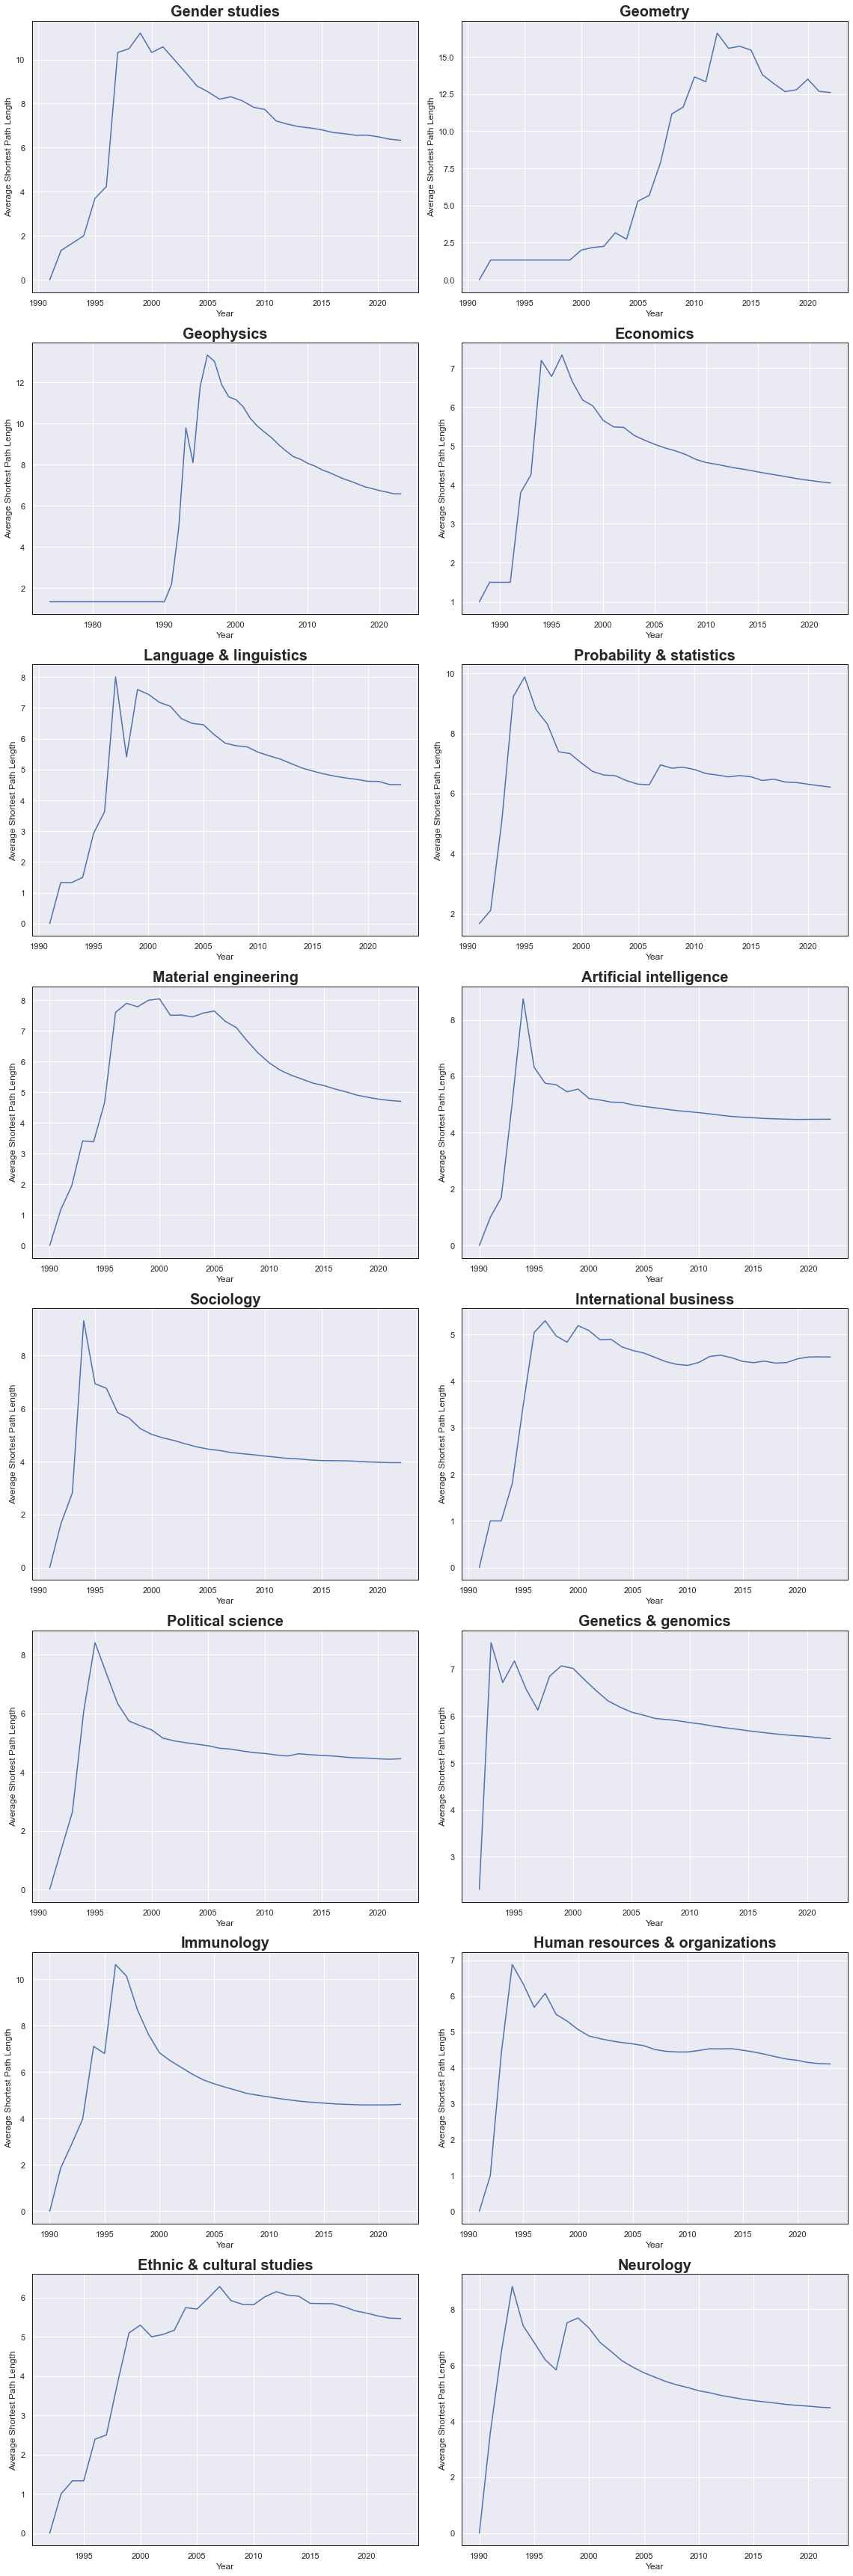

In [163]:
n_cols = 2
n_rows = np.ceil(len(field_names) / n_cols)

sns.set()

fig, axs = plt.subplots(int(n_rows), int(n_cols), figsize=(n_cols*8, n_rows*6))
for field_name, (years, dois), ax in zip(field_names, data, axs.flatten()):

    print(field_name)

    df = pl.read_csv(os.path.join(OUTPUT_PATH, 'citation_graphs', field_name + '.edgelist'), sep=' ', has_header=False)
    G = nx.from_pandas_edgelist(df, create_using=nx.DiGraph, source='column_1', target='column_2')

    avg_shortest_paths = {}
    for year, doi in zip(years, dois):
        G_sub = G.subgraph(doi)
        large_component = list(nx.weakly_connected_components(G_sub))
        if len(large_component) == 0:
            avg_shortest_paths[year] = 0
            continue
        connected_component = max(large_component, key=len)
        G_t = G.subgraph(connected_component)
        G_t = G_t.to_undirected()
        average_shortest_path_length = nx.average_shortest_path_length(G_t)
        avg_shortest_paths[year] = average_shortest_path_length
        # print(average_shortest_path_length)

    years = avg_shortest_paths.keys()
    avg_shortest_paths = avg_shortest_paths.values()

    ax.plot(years, avg_shortest_paths)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Shortest Path Length')

    ax.set_title(field_name.capitalize(), fontweight='semibold', fontsize=20)

    ax.spines['top'].set_color('k')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['right'].set_color('k')
    ax.spines['right'].set_linewidth(1)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1)

fig.tight_layout()
# plt.savefig(f'{OBSIDIAN_IMG_PATH}/avg_shortest_path_length.png')

plt.show()

# 2 h

# Temporal In Degree Centrality

In [155]:
temporal_dfs_path = os.path.join(OUTPUT_PATH, 'temporal_dfs')
temporal_map = {}
for file_name in os.listdir(temporal_dfs_path):
    field_name = file_name.split('.parquet')[0]
    df = pl.read_parquet(os.path.join(temporal_dfs_path, file_name))
    temporal_map[field_name] = df.select(pl.col('Year'), pl.col('CumDoi'))

Gender Studies
Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


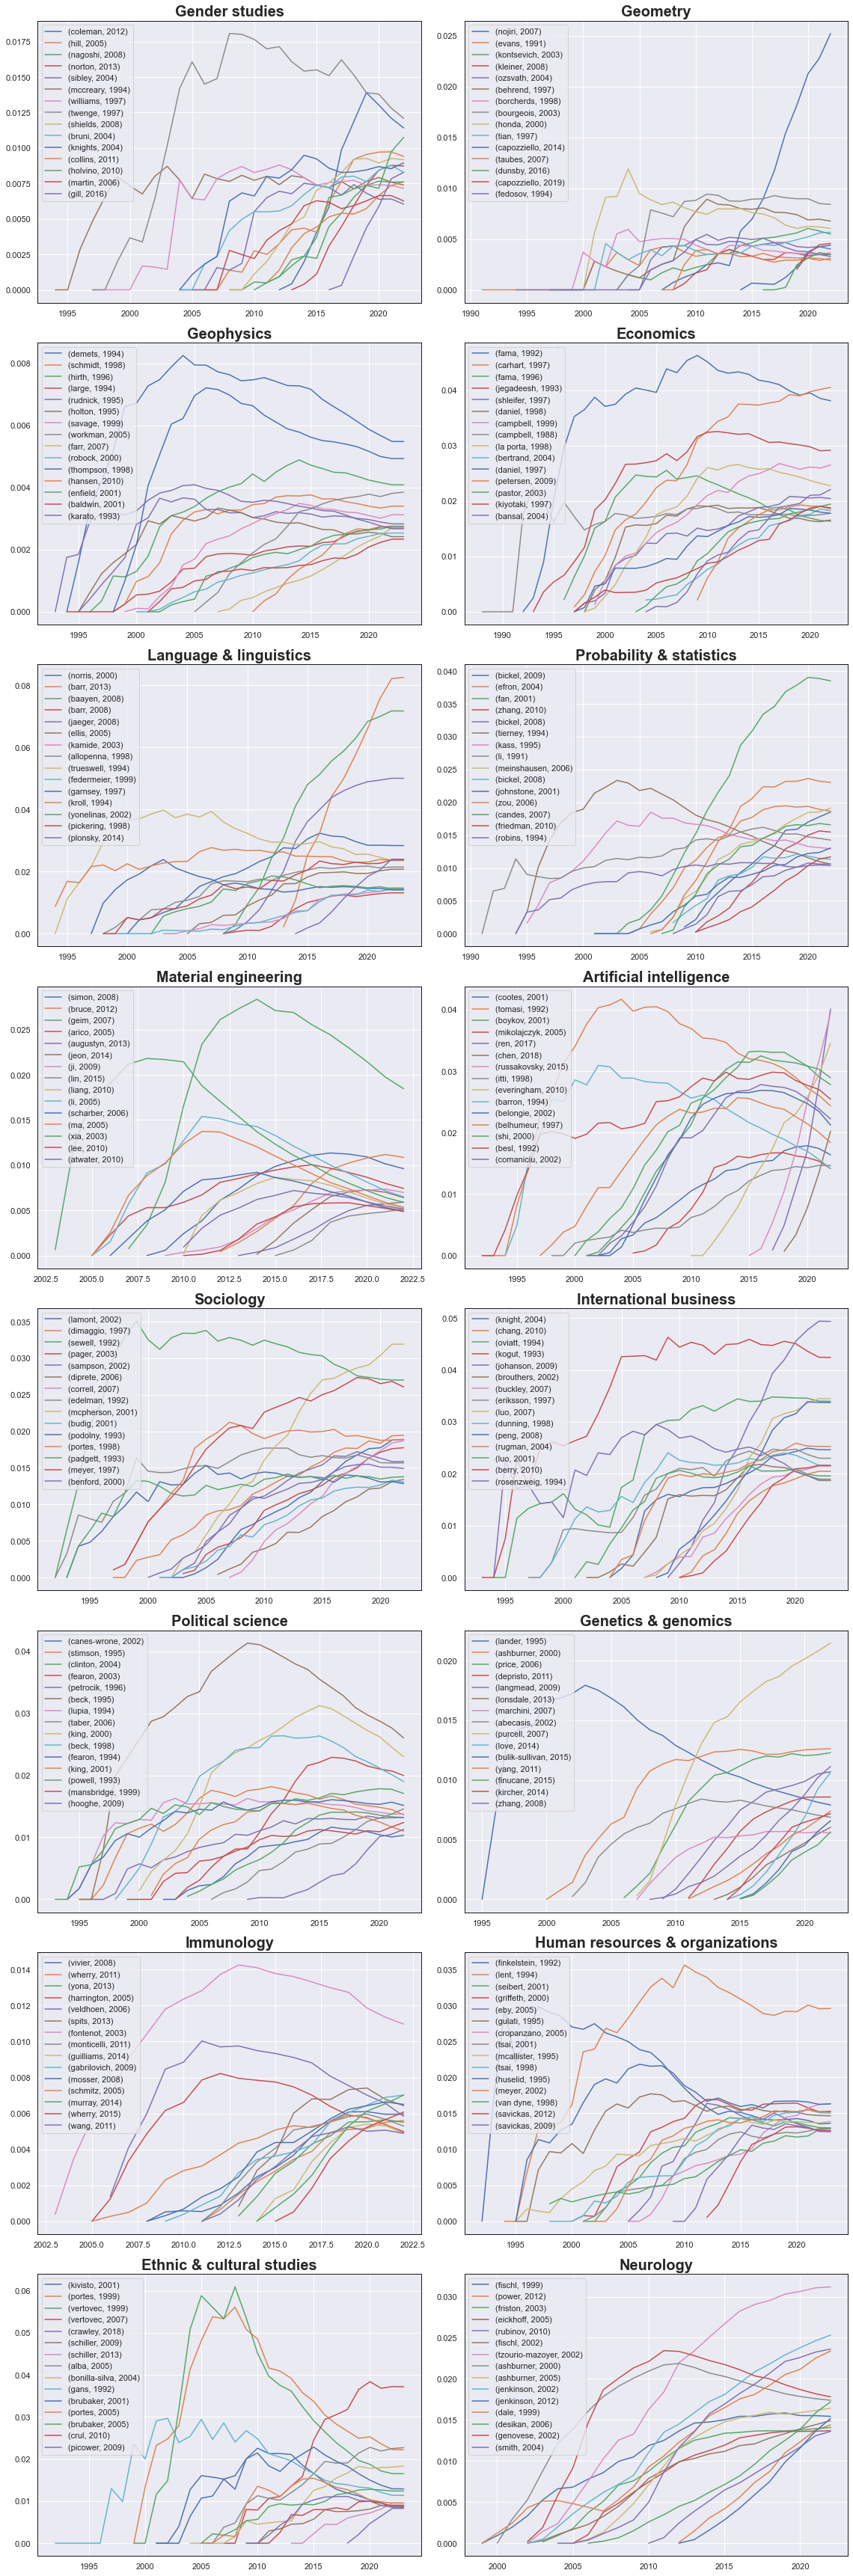

In [161]:
n = 15
n_cols = 2
n_rows = np.ceil(len(field_names) / n_cols)

sns.set()

fig, axs = plt.subplots(int(n_rows), int(n_cols), figsize=(n_cols*8, n_rows*6))
for (field_name, years_dois), ax in zip(temporal_map.items(), axs.flatten()):
    print(field_name)

    df = pl.read_csv(os.path.join(OUTPUT_PATH, f'citation_graphs/{field_name}.edgelist'), sep=' ', new_columns=['source', 'target'])
    G = nx.from_pandas_edgelist(df, create_using=nx.DiGraph)

    yearly_centralities = {}
    for year, doi in years_dois.to_numpy():
        all_centralities = dict(zip(G.nodes, np.full(len(G), None)))
        year_centralities = dict(nx.in_degree_centrality(G.subgraph(doi)))
        all_centralities.update(year_centralities)
        yearly_centralities[year] = all_centralities

    years = list(yearly_centralities.keys())
    centralities = list(yearly_centralities.values())

    df = (
        pl.from_dicts(centralities)
        .with_columns(
            pl.Series('Year', years, pl.UInt32), 
            pl.all(),
        )
    )

    df_temp = df.transpose(include_header=True, header_name='Doi', column_names=df['Year'].cast(pl.Utf8).to_list())[:-1]
    last_col = df_temp[:, -1].name
    most_cited = df_temp.select(pl.col('Doi'), pl.col(last_col)).sort(last_col, descending=True)[:n]['Doi'].to_list()
    df_t = df_temp.filter(pl.col('Doi').is_in(most_cited)) # .transpose(include_header=True, header_name='Year', column_names=df_temp['Doi'].to_list())[1:]
    dois = df_t['Doi'].to_list()
    df_dates = df_t.select(pl.all().exclude('Doi'))
    years = df_dates.columns
    x = list(map(lambda s: int(s), years))
    ys = df_dates.to_numpy()

    lst_doi = df_t['Doi'].to_list()
    doi_name_map = get_node_names(field_name, lst_doi)

    ax.spines['top'].set_color('k')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['right'].set_color('k')
    ax.spines['right'].set_linewidth(1)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1)

    ax.set_title(field_name.capitalize(), fontweight='semibold', fontsize=20)

    for y, doi in zip(ys, lst_doi):
        ax.plot(x,y, label=doi_name_map[doi])

    ax.legend()

fig.tight_layout()
# plt.savefig(f'{OBSIDIAN_IMG_PATH}/citation_temporal_indegree_centrality.png')
plt.show()

# 12 m

# Temporal Clustering

In [7]:
temporal_dfs_path = os.path.join(OUTPUT_PATH, 'temporal_dfs')
data = []
field_names = []
for file_name in os.listdir(temporal_dfs_path):
    field_name = file_name.split('.parquet')[0]
    df = pl.read_parquet(os.path.join(temporal_dfs_path, file_name))
    field_names.append(field_name)
    data.append((df['Year'], df['CumDoi']))

Gender Studies
Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


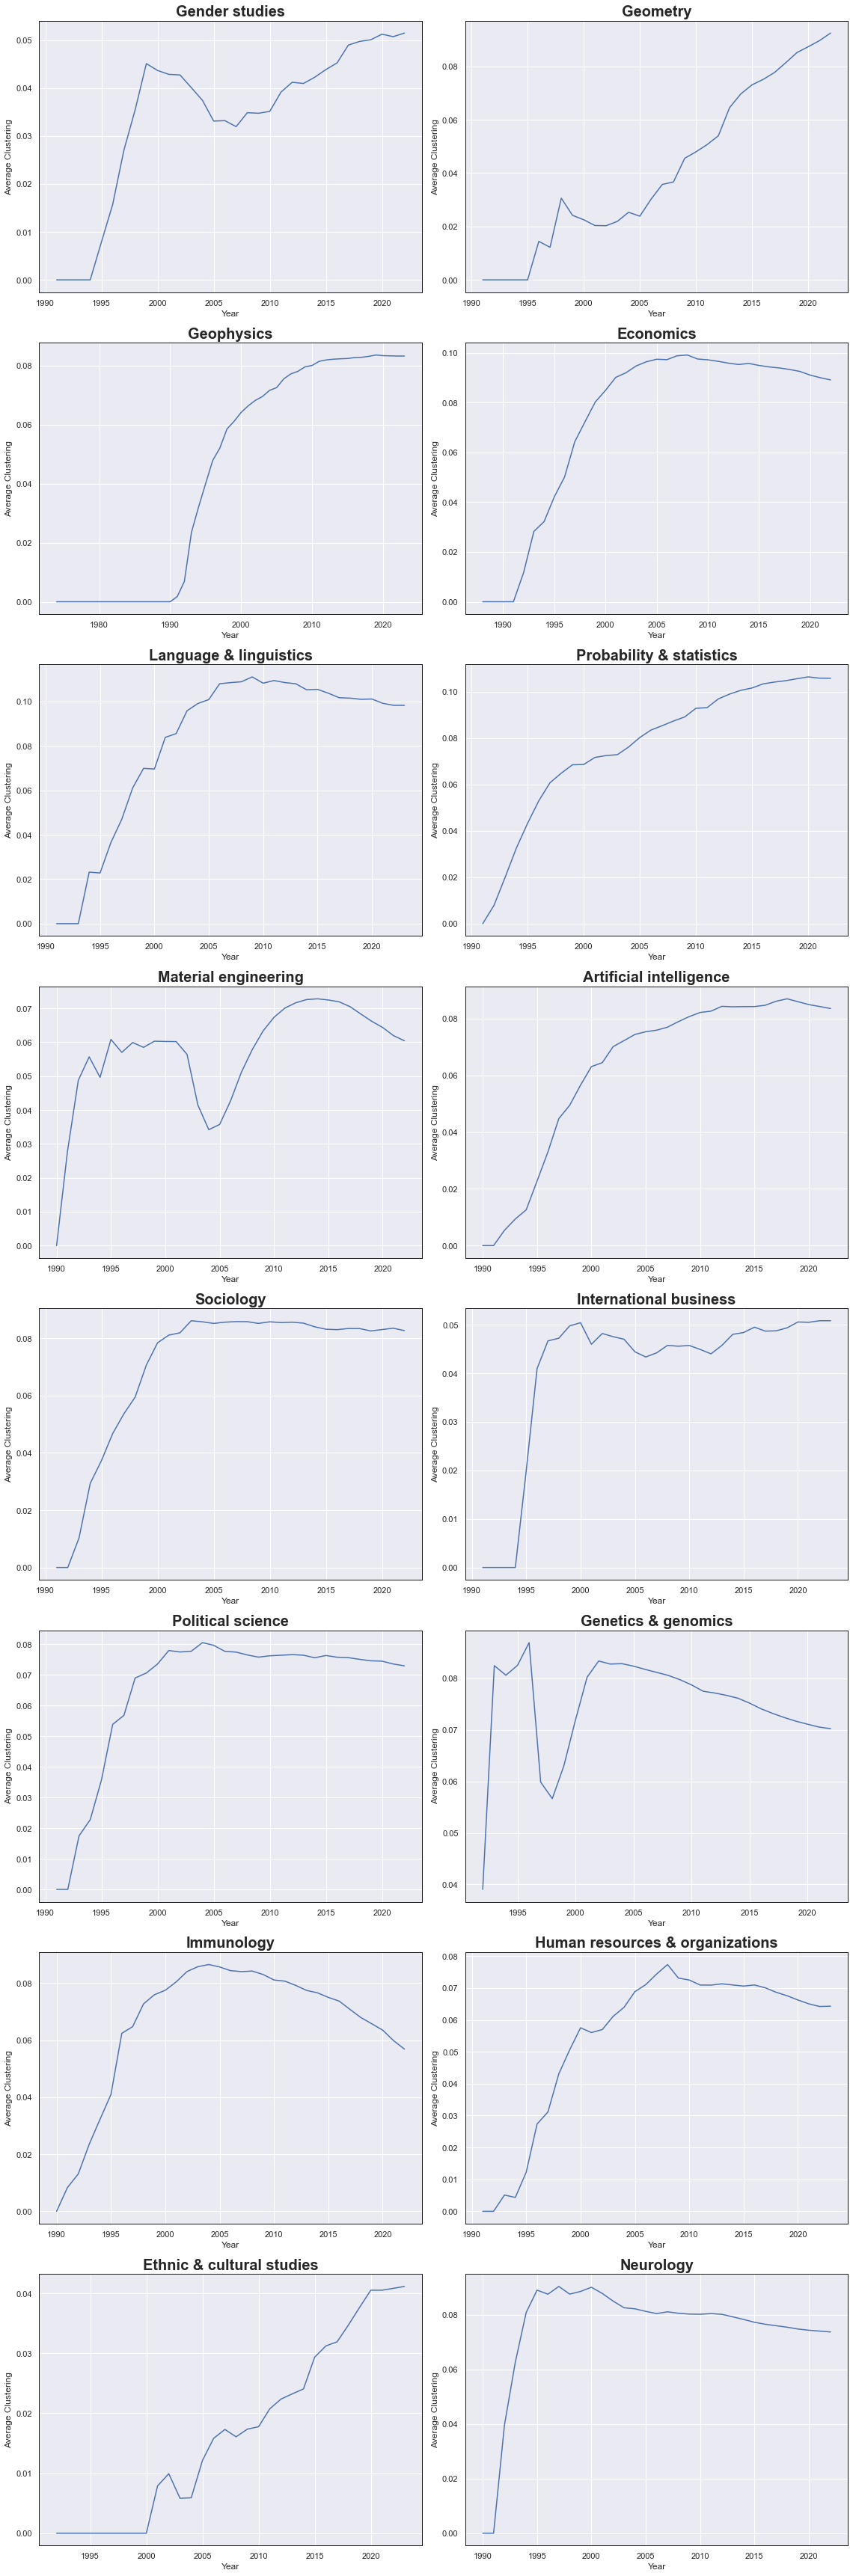

In [8]:
n_cols = 2
n_rows = np.ceil(len(field_names) / n_cols)

sns.set()

fig, axs = plt.subplots(int(n_rows), int(n_cols), figsize=(n_cols*8, n_rows*6))
for field_name, (years, dois), ax in zip(field_names, data, axs.flatten()):

    print(field_name)

    df = pl.read_csv(os.path.join(OUTPUT_PATH, 'citation_graphs', field_name + '.edgelist'), sep=' ', has_header=False)
    G = nx.from_pandas_edgelist(df, create_using=nx.DiGraph, source='column_1', target='column_2')

    avg_clustering = {}
    for year, doi in zip(years, dois):
        G_sub = G.subgraph(doi)
        # large_component = list(nx.weakly_connected_components(G_sub))
        # if len(large_component) == 0:
        #     avg_clustering[year] = 0
        #     continue
        # connected_component = max(large_component, key=len)
        # G_t = G.subgraph(connected_component)
        # G_t = G_t.to_undirected()
        avg_clustering[year] = nx.average_clustering(G_sub)

    years = avg_clustering.keys()
    avg_clustering = avg_clustering.values()

    ax.plot(years, avg_clustering)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Clustering')

    ax.set_title(field_name.capitalize(), fontweight='semibold', fontsize=20)

    ax.spines['top'].set_color('k')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['right'].set_color('k')
    ax.spines['right'].set_linewidth(1)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1)

fig.tight_layout()
plt.savefig(f'{OBSIDIAN_IMG_PATH}/temporal_clustering.png')

plt.show()

# 2 h

# Tempral Transitivity

In [5]:
temporal_dfs_path = os.path.join(OUTPUT_PATH, 'temporal_dfs')
data = []
field_names = []
for file_name in os.listdir(temporal_dfs_path):
    field_name = file_name.split('.parquet')[0]
    df = pl.read_parquet(os.path.join(temporal_dfs_path, file_name))
    field_names.append(field_name)
    data.append((df['Year'], df['CumDoi']))

Gender Studies
Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


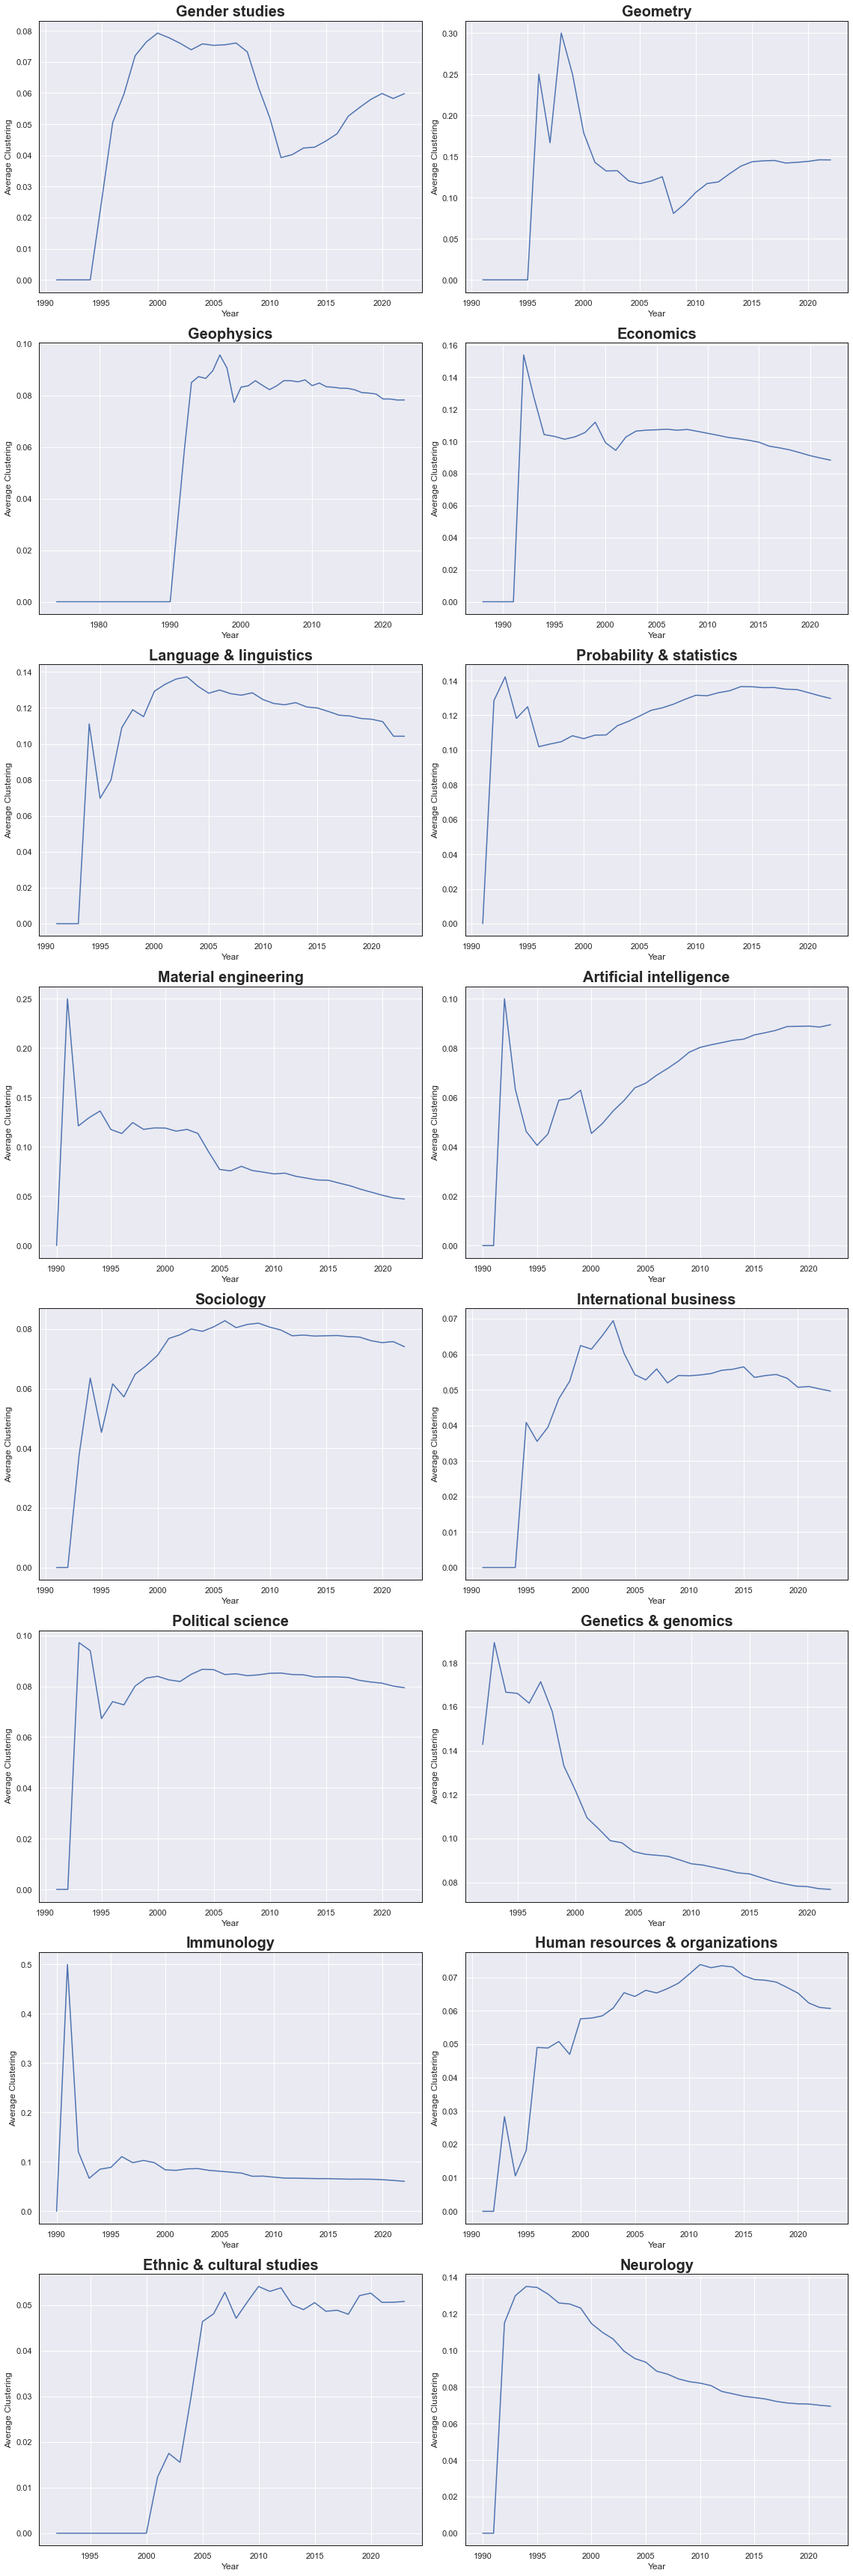

In [9]:
n_cols = 2
n_rows = np.ceil(len(field_names) / n_cols)

sns.set()

fig, axs = plt.subplots(int(n_rows), int(n_cols), figsize=(n_cols*8, n_rows*6))
for field_name, (years, dois), ax in zip(field_names, data, axs.flatten()):

    print(field_name)

    df = pl.read_csv(os.path.join(OUTPUT_PATH, 'citation_graphs', field_name + '.edgelist'), sep=' ', has_header=False)
    G = nx.from_pandas_edgelist(df, create_using=nx.DiGraph, source='column_1', target='column_2')

    avg_transitivity = {}
    for year, doi in zip(years, dois):
        G_sub = G.subgraph(doi)
        # large_component = list(nx.weakly_connected_components(G_sub))
        # if len(large_component) == 0:
        #     avg_transitivity[year] = 0
        #     continue
        # connected_component = max(large_component, key=len)
        # G_t = G.subgraph(connected_component)
        # G_t = G_t.to_undirected()
        avg_transitivity[year] = nx.transitivity(G_sub)

    years = avg_transitivity.keys()
    avg_transitivity = avg_transitivity.values()

    ax.plot(years, avg_transitivity)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Clustering')

    ax.set_title(field_name.capitalize(), fontweight='semibold', fontsize=20)

    ax.spines['top'].set_color('k')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['right'].set_color('k')
    ax.spines['right'].set_linewidth(1)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1)

fig.tight_layout()
plt.savefig(f'{OBSIDIAN_IMG_PATH}/temporal_transitivity.png')

plt.show()

# 2 h